In [1]:
from mmodes import Consortium, dMetabolite
cons = Consortium(stcut=-1, mets_to_plot = ["glc__D_e", "ac_e"])

In [2]:
glc = dMetabolite(id = "glc__D_e", Km = 14.8, Vmax = 0.13)

path_to_SAL9 = '../GEMS/SAL9.xml'
# path_to_MAM2 = '../GEMS/MAM2.xml'

cons.add_model(path_to_SAL9, 0.0003, dMets = {glc.id: glc})
# cons.add_model(path_to_MAM2, 0.0005, dMets = {glc.id: glc})

In [3]:
compounds = ['co2',
 'ca2',
 'cu2',
 'zn2',
 'cobalt2',
 'k',
 'fe2',
 'mn2',
 'h',
 'mg2',
 'so4',
 'na1',
 'slnt',
 'glc__D',
 'mobd',
 'nh4',
 'o2',
 'cl',
 'ni2',
 'sel',
 'pi',
 'fe3',
 'phe__L',
 'h2o',
 'tungs']

e_cs = []
for compound in compounds:
    e_cs.append(compound + "_e")

In [4]:
abs_media = {k: 10 for k in cons.media}

for compound in abs_media.keys():
    if compound in e_cs:
        abs_media[compound] = 10
    else:
        abs_media[compound] = 0

cons.media = cons.set_media(abs_media)

In [5]:
print(cons)

Consortium MMODES object with 1 volume and 1 models: 
MMODES model object of SAL9, path in ../GEMS/SAL9.xml and actual biomass of 0.0003


Running... [--------------------] 0.01%
pFBA infeasible at 0.0003432259064882502 hours
SAL9 -> 0.0003
Glucose -> 9.99999998920513
Acetate -> 0



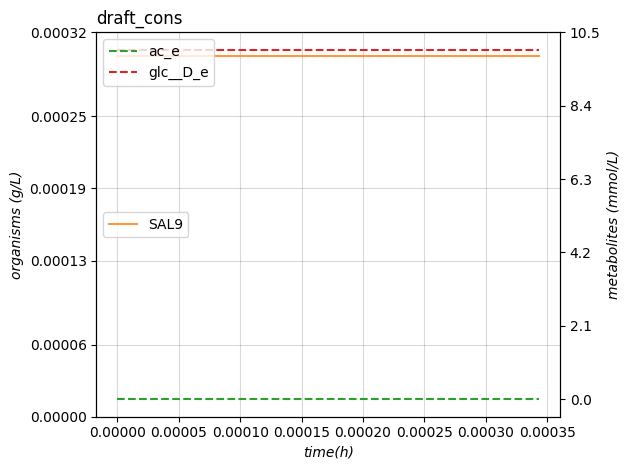

In [7]:
cons.run(maxT = 10, outp = "plot_example.png", outf = "tab_example.tsv", verbose=True)
# print information pieces on screen
for mod in cons.models:
    print(mod, cons.models[mod].volume.q, sep = " -> ")
print("Glucose", str(cons.media["glc__D_e"]), sep = " -> ")
print("Acetate", str(cons.media["ac_e"]), sep = " -> ", end = "\n\n")